# Getting started with Task 3

Download the dataset from the [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106) using the script `download_intracardiac_dataset.sh`:

```bash
source download_intracardiac_dataset.sh
```

## Load Modules and Preprocessing Functions

Load modules and preprocessing functions.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
drive_path = '/content/drive/MyDrive/cardiac_challenge_team6'
local_path = '../'

In [15]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List

Load the `cardiac_ml_tools` module.

In [ ]:
%run $drive_path/notebooks/cardiac_ml_tools.py

## Load the dataset

In [ ]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
DIR= '../intracardiac_dataset/'  # This should be the path to the intracardiac_dataset, it can be downloaded using data_science_challenge_2023/download_intracardiac_dataset.sh
for x in os.listdir(DIR):
    if re.match(regex, x):
        data_dirs.append(DIR + x)
file_pairs = read_data_dirs(data_dirs)
print('Number of file pairs: {}'.format(len(file_pairs)))
# example of file pair
print("Example of file pair:")
print("{}\n{}".format(file_pairs[0][0], file_pairs[0][1]))


Number of file pairs: 0
Example of file pair:


IndexError: list index out of range

## Dataset details

The dataset [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106)
consists of pairs of computationally simulated intracardiac transmembrane voltage recordings and ECG signals.
In total, 16140 organ-level simulations were conducted to create this dataset.
Simulations were performed using Lassen supercomputer at Lawrence Livermore National Lab (LLNL), concurrently utilizing 4 GPUs and 40 CPU cores.
Each simulation produced pairs of 500ms-by-10 raw electrode signals and 500ms-by-75 transmembrane voltage signals.
For convenience, we collect those signals in matrices and give them the following names:

Tensor | Description | Shape | Notes
--- | --- | --- | ---
$X$ | Row electrode signals | $10 \times 500$ | 10-lead ECG signals from the simulated torso (in [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106))
$V$ | Activation map | $75 \times 500$ | Transmembrane voltage signals from the simulated heart (in [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106))
$E$ | 12-lead ECG signals | $12 \times 500$ | 12-lead ECG signals obtained by `get_standard_leads`($X$)
$A$ | Activation map | $75 \times 1$ | Activation time, defined as $A_i = \text{min}_j(V_{ij})$

**IMPORTANT** : The raw data in the dataset consists of 10-lead ECG signals and 75-lead transmembrane voltage signals. The 12-lead ECG signals are obtained from the 10-lead ECG signals using the function `get_standard_leads` (in the file `cardiac_ml_tools.py`).

The overall generation process is shown in the following image. The ECG signal is recorded using 10 virtual electrodes and the transmembrane voltages are recorded at 75 points within the myocardium. The transmembrane voltages are then used to generate the spatio-temporal activation maps.

![ECG 10 2 12](../figures/data_generation.png)

## Getting the standard 12-lead ECG from the 10-lead ECG

The function `get_standard_leads` (in the file `cardiac_ml_tools.py`) is used to obtain the 12-lead ECG signals from the 10-lead ECG signals. It implements the following transformation, where the (Wilson Lead) is defined as $Vw = 1/3*(RA + LA + LL)$:
$$
\left\{
\begin{array}{lll}
    X_{:,1}  & \to  & RA \\
    X_{:,2}  & \to  & LA \\
    X_{:,3}  & \to  & LL \\
    X_{:,4}  & \to  & RL \\
    X_{:,5}  & \to  & V1 \\
    X_{:,6}  & \to  & V2 \\
    X_{:,7}  & \to  & V3 \\
    X_{:,8}  & \to  & V4 \\
    X_{:,9}  & \to  & V5 \\
    X_{:,10} & \to &  V6 \\
\end{array}
\right.
\text{        and        }
\left\{
\begin{array}{lll}          
\text{Lead } I& : & LA - RA \\
\text{Lead } II& : & LL - RA \\
\text{Lead } III& : & LL - LA \\
\text{Lead } aVR& : &  \frac{3}{2} (RA - Vw) \\
\text{Lead } aVL& : &  \frac{3}{2} (LA - Vw) \\
\text{Lead } aVF& : &  \frac{3}{2} (LL - Vw)\\
\text{Lead } V1 & : & V1 - Vw \\
\text{Lead } V2 & : & V2 - Vw \\
\text{Lead } V3 & : & V3 - Vw \\
\text{Lead } V4 & : & V4 - Vw \\
\text{Lead } V5 & : & V5 - Vw \\
\text{Lead } V6 & : & V6 - Vw \\
\end{array}
\right.
$$


Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


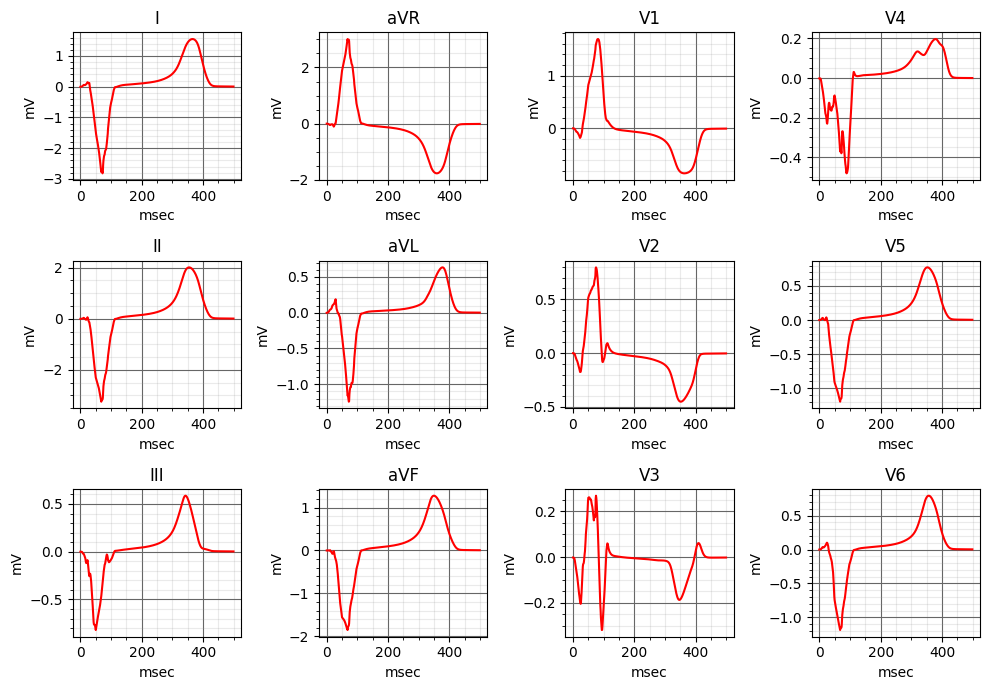

In [ ]:
# Example of file pair
case = 213
# ECG plot
row = 3
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

# create a figure with 12 subplots
for i in range(pECGData.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

## Getting the transmembrane voltages

Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


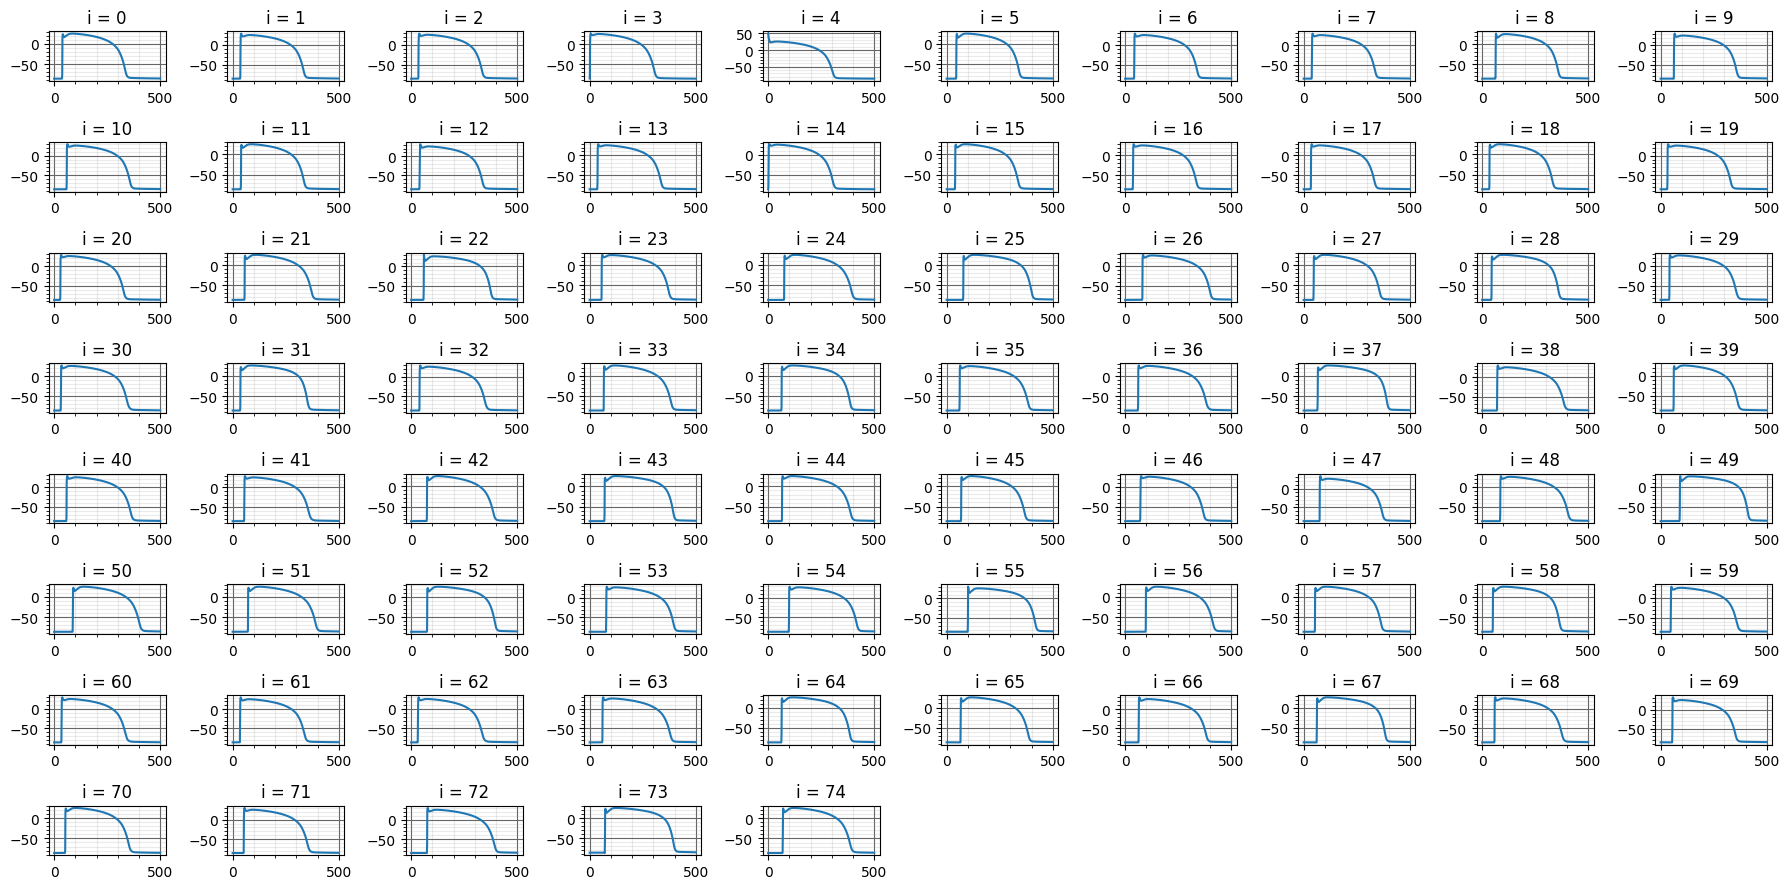

In [ ]:
# Example of file pair
case = 213
# Vm plot
row = 7
column = 10
plt.figure(figsize=(18, 9))

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

for count, i in enumerate(range(VmData.shape[1])):
    plt.subplot(8, 10, count + 1)
    plt.plot(VmData[0:num_timesteps,i])
    plt.title(f'i = {i}')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    # plt.xlabel('msec')
    # plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()


## Task 4: Learning the mapping from the 12-lead ECG to the 75 transmembrane voltages

Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy
Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


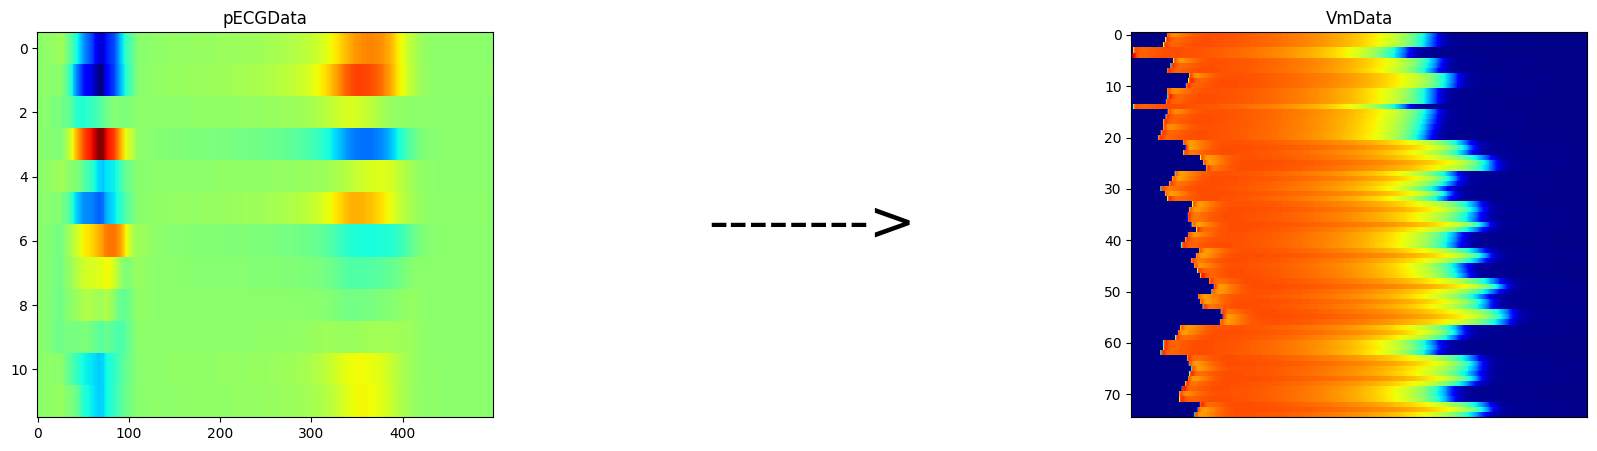

In [ ]:
# make a plot with the "pECGData" -> "ActTime"
case = 213

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

# plot in row the tensors pECGData and ActTime with an arrow pointing to the activation time
row = 1
column = 3
plt.figure(figsize=(20, 5))
plt.subplot(row, column, 1)
# plot pECGData transposed
plt.imshow(pECGData.T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('pECGData')
plt.subplot(row, column, 2)
# print a text "->"
plt.text(0.5, 0.5, '-------->', fontsize=40, horizontalalignment='center', verticalalignment='center')
plt.axis('off')
plt.subplot(row, column, 3)
# plot Vm transposed
plt.imshow(VmData.T, cmap='jet', interpolation='nearest', aspect='auto')
# not xticks
plt.xticks([])
plt.title('VmData')
plt.show()
plt.close()

# Tricks

- As in many machine learning problems, normalization of the data might be helpful or even necessary. Different normalization schemes might be applied.

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Dense, BatchNormalization, MaxPooling1D, UpSampling1D, Conv1DTranspose, Concatenate, Input
from tensorflow.keras import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

drive_path = '/content/drive/MyDrive/cardiac_challenge_team6'
local_path = '../'

In [6]:
# load data from files into numpy arrays

#ECG_Data = np.load(f'{drive_path}/Task_3_4_Data/ECG_Data.npy')
#ActTimes = np.load(f'{drive_path}/Task_3_4_Data/Activation_Times.npy')
VMData = np.load(f'{drive_path}/Task_3_4_Data/VmData.npy')

In [8]:
# load normalized TRANSPOSED data (X data transposed, Y data not)
ecg_data_norm = np.load(f'{drive_path}/Task_3_4_Data_norm/ECG_Data_NORM_T.npy')
vm_data_norm = np.load(f'{drive_path}/Task_3_4_Data_norm/VmData_NORM.npy')
#act_data_norm = np.load(f'{drive_path}/Task_3_4_Data_norm/Activation_Times_NORM_T.npy')

In [9]:
# split data

x_train, x_temp, y_train, y_temp = train_test_split(
    ecg_data_norm, vm_data_norm, test_size=.3, random_state=24
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=.5, random_state=24
)

print(x_train.shape, y_train.shape)

(11281, 12, 500) (11281, 500, 75)


In [10]:
def R2(y, y_pred):
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.truediv(residual, total))
  return r2

In [36]:
''' Alternate model
R2 @ 20 epochs = 0.906
'''
#define model

''' TRANSPONSE X DATA FROM 500x12 TO 12x500 '''
in_shape=(12,500)

# output_shape = ((input_shape - kernel_size) / stride) + 1
convnet_model = Sequential()

convnet_model.add(Conv1D(filters=75, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=in_shape))
convnet_model.add(Conv1D(filters=64, kernel_size=6, strides=3, padding='same', activation='relu'))
convnet_model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
convnet_model.add(BatchNormalization())

convnet_model.add(Conv1DTranspose(filters=64, kernel_size=3, strides=2, activation='relu'))
convnet_model.add(Conv1DTranspose(filters=64, kernel_size=3, strides=3, activation='relu'))
convnet_model.add(Conv1DTranspose(filters=64, kernel_size=3, strides=4, activation='relu'))
convnet_model.add(Conv1DTranspose(filters=128, kernel_size=12, strides=4, activation='relu'))
convnet_model.add(Conv1D(filters=128, kernel_size=9, strides=1, padding='same', activation='relu'))
convnet_model.add(Conv1D(filters=256, kernel_size=12, strides=1, padding='same', activation='relu'))
convnet_model.add(BatchNormalization())

convnet_model.add(Conv1DTranspose(filters=512, kernel_size=12, strides=3, activation='relu'))
convnet_model.add(Conv1DTranspose(filters=256, kernel_size=8, strides=3, activation='relu'))
convnet_model.add(Conv1DTranspose(filters=256, kernel_size=8, strides=1, activation='relu'))
convnet_model.add(Conv1D(filters=128, kernel_size=10, strides=2, padding='same', activation='relu'))
convnet_model.add(Conv1D(filters=64, kernel_size=6, strides=1, padding='same', activation='relu'))
convnet_model.add(MaxPooling1D(pool_size=2))
convnet_model.add(BatchNormalization())

convnet_model.add(Conv1D(filters=32, kernel_size=6, strides=2, padding='same', activation='relu'))
convnet_model.add(Conv1D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
convnet_model.add(Dense(units=75, activation='tanh'))

print(convnet_model.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_190 (Conv1D)         (None, 12, 75)            112575    
                                                                 
 conv1d_191 (Conv1D)         (None, 4, 64)             28864     
                                                                 
 conv1d_192 (Conv1D)         (None, 4, 64)             12352     
                                                                 
 batch_normalization_60 (Bat  (None, 4, 64)            256       
 chNormalization)                                                
                                                                 
 conv1d_transpose_111 (Conv1  (None, 9, 64)            12352     
 DTranspose)                                                     
                                                                 
 conv1d_transpose_112 (Conv1  (None, 27, 64)         

In [38]:
# fit model

convnet_model.compile(optimizer='adam', loss='mse', metrics=[R2])
hist = convnet_model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
177/177 [==============================] - 97s 509ms/step - loss: 0.1141 - R2: 0.0017 - val_loss: 0.1142 - val_R2: 0.0011
Epoch 2/10
177/177 [==============================] - 89s 502ms/step - loss: 0.1141 - R2: 0.0017 - val_loss: 0.1142 - val_R2: 0.0011
Epoch 3/10
177/177 [==============================] - 89s 501ms/step - loss: 0.1141 - R2: 0.0017 - val_loss: 0.1142 - val_R2: 0.0011
Epoch 4/10
177/177 [==============================] - 89s 502ms/step - loss: 0.1141 - R2: 0.0017 - val_loss: 0.1142 - val_R2: 0.0011
Epoch 5/10
177/177 [==============================] - 89s 503ms/step - loss: 0.1141 - R2: 0.0016 - val_loss: 0.1142 - val_R2: 0.0011
Epoch 6/10
177/177 [==============================] - 89s 501ms/step - loss: 0.1141 - R2: 0.0017 - val_loss: 0.1142 - val_R2: 0.0011
Epoch 7/10
177/177 [==============================] - 89s 501ms/step - loss: 0.1141 - R2: 0.0017 - val_loss: 0.1142 - val_R2: 0.0011
Epoch 8/10
177/177 [==============================] - 88s 499ms/step 

In [40]:
#sc_model.save(f'{drive_path}/trained_models/task_4_mapping_skip_connections_R2.9563.h5')
convnet_model.save(f'{drive_path}/trained_models/task_4_mapping_convnet_transposed_R2.BAD.h5')

In [41]:
tf.keras.utils.get_custom_objects().update({'R2': R2})

model = tf.keras.models.load_model(f'{drive_path}/trained_models/task_4_mapping_convnet_transposed_R2.BAD.h5') # convnet_model
#model = tf.keras.models.load_model(f'{drive_path}/trained_models/task_4_mapping_skip_connections_R2.9563.h5') # sc_model


In [43]:
def vm_unnorm(norm_vm, min_vm, max_vm):
  vm_unnorm = np.zeros((norm_vm.shape[0], norm_vm.shape[1], norm_vm.shape[2]))

  for i, heart in enumerate(norm_vm):
    for j, mapping in enumerate(heart):
      for k, scaled_voltage in enumerate(mapping):
        temp_min = min_vm[k]
        temp_max = max_vm[k]
        original = scaled_voltage * (temp_max - temp_min) + temp_min
        vm_unnorm[i][j][k] = original
  return vm_unnorm

min_vm = np.amin(VMData, axis=(0,1))
max_vm = np.amax(VMData, axis=(0,1))

y_test_unnorm = vm_unnorm(y_test, min_vm, max_vm)

In [42]:
y_pred = model.predict(x_test)


76/76 [==============================] - 8s 82ms/step


In [44]:
print(y_test.shape, y_pred.shape, x_test.shape)
y_pred_unnorm = vm_unnorm(y_pred, min_vm, max_vm)
print(y_test_unnorm.shape, y_pred_unnorm.shape)
diff =  abs( y_pred_unnorm - y_test_unnorm )
print(np.mean(diff))

(2418, 500, 75) (2418, 500, 75) (2418, 12, 500)
(2418, 500, 75) (2418, 500, 75)
44.95347499313211


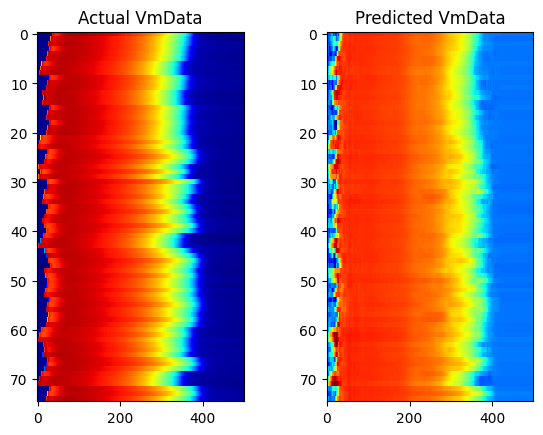

In [ ]:
# plot mapping
# plot in row the tensors pECGData and ActTime with an arrow pointing to the activation time
plt.figure(1)
plt.subplot(1,2,1)
# plot Vm transposed
plt.imshow(y_test[100].T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Actual VmData')

plt.subplot(1,2,2)
plt.imshow(y_pred[100].T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title("Predicted VmData")

plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
# Get the training and validation loss values from the history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a plot to visualize the loss values
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Get the training and validation R2 values from the history
R2 = hist.history['R2']
val_R2 = hist.history['val_R2']

# Create a plot to visualize R2 over epochs
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, R2, label='Training R2')
plt.plot(epochs, val_R2, label='Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.title('Training and Validation R2-score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def box_plots(predictions, y_values):
  import seaborn as sns
  import pandas as pd

  transposed_preds = np.transpose(predictions, (0, 2, 1))
  transposed_Y = np.transpose(y_values, (0, 2, 1))

  transposed_diff = abs(transposed_Y - transposed_preds)

  df = pd.DataFrame([], range(transposed_preds.shape[0]) ,range(1, transposed_preds.shape[1]+1))

  for sample in range(transposed_diff.shape[0]):
    for point in range(1, transposed_diff.shape[1]+1):
      df[(point)][sample] = transposed_diff[sample][point-1].mean()


  plt.figure(figsize=(24,12))
  sns.boxplot(data=df, orient = 'v')

In [ ]:
# graph VmData for a single sample (given in the getting started notebook)

def VmGraph(VmData):
  plt.figure(figsize=(18, 9))
  num_timesteps = 500

  for count, i in enumerate(range(VmData.shape[1])):
    plt.subplot(8, 10, count + 1)
    plt.plot(VmData[0:num_timesteps,i])
    plt.title(f'i = {i}')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    # plt.xlabel('msec')
    # plt.ylabel('mV')
  plt.tight_layout()
  plt.show()
  # close
  plt.close()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 500, 75)           2775      
                                                                 
 conv1d_11 (Conv1D)          (None, 167, 64)           28864     
                                                                 
 conv1d_12 (Conv1D)          (None, 167, 64)           12352     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 83, 64)           0         
 1D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 83, 64)           256       
 ormalization)                                                   
                                                                 
 conv1d_transpose (Conv1DTra  (None, 167, 64)          1